Import Libraries

In [2]:
import pandas as pd


In [6]:
import seaborn as sns


In [7]:

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots we will create

In [9]:
data = pd.read_csv(r'C:\Users\bilal\pythontutorials\movies.csv')

looking at data

In [10]:
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


checking index

In [11]:
data.index

RangeIndex(start=0, stop=7668, step=1)

checking datatypes

In [12]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

checking null values

In [32]:
data.isnull().sum()

name         0
rating      77
genre        0
year         0
released     0
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

changing the data type

In [21]:
data.budget.fillna(data.budget.mean(),inplace = True)

In [24]:
data.budget = data.budget.astype('int64')

In [27]:

data.gross.fillna(data.gross.mean(), inplace = True)

In [28]:
data.gross = data.gross.astype('int64')

drop duplicates

In [33]:
data.company.drop_duplicates()

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

Budget correlarton with scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

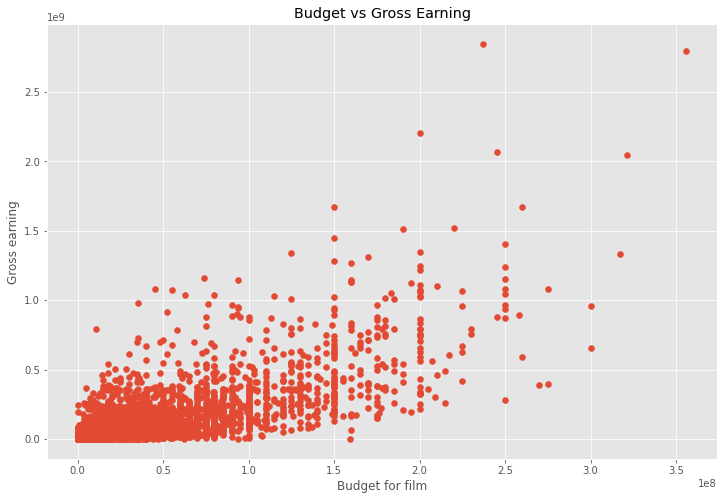

In [38]:
plt.scatter(x= data.budget, y = data.gross)
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget for film')
plt.ylabel('Gross earning')

plt.show

Plot Budget vs gross earning using seaborn

<AxesSubplot:xlabel='budget', ylabel='gross'>

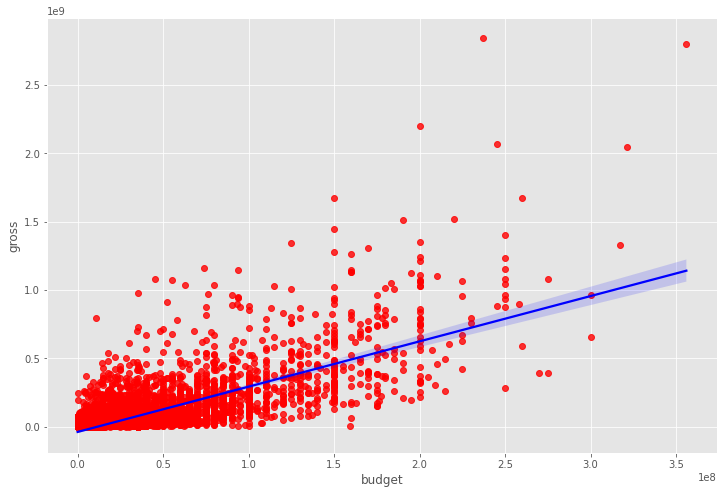

In [41]:
sns.regplot(x= data.budget, y = data.gross, scatter_kws={"color": "red"}, line_kws={"color": "blue"} )

Correlation

In [42]:
data.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000


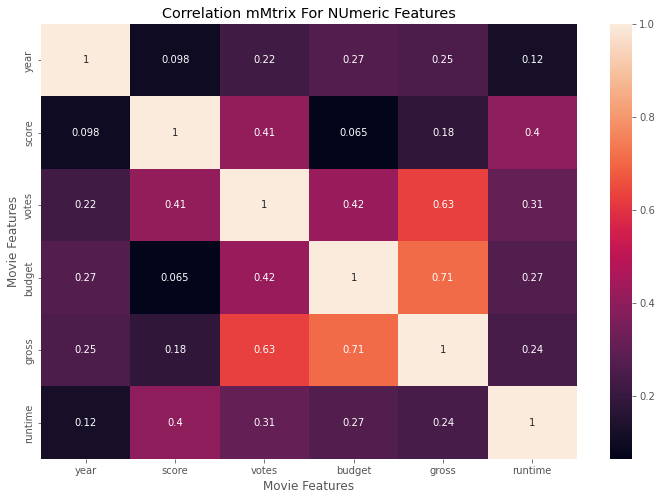

In [46]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation mMtrix For NUmeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Numerizing data into categories for correlation

In [47]:
data_numerized = data
for col_name in data_numerized.columns:
    if(data_numerized[col_name].dtype == 'object'):
        data_numerized[col_name] = data_numerized[col_name].astype('category')
        data_numerized[col_name] = data_numerized[col_name].cat.codes
data_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1706,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,1980,1493,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,1980,1772,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,1980,1493,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1027,6,4,1980,1544,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2965,3.1,18.0,1500,2289,2421,55,7000,78500541,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,35589876,78500541,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,78500541,941,NaN
7666,2843,-1,6,2020,2818,NaN,NaN,1184,1824,450,55,15000,78500541,-1,120.0


Correlation Matrix including all data

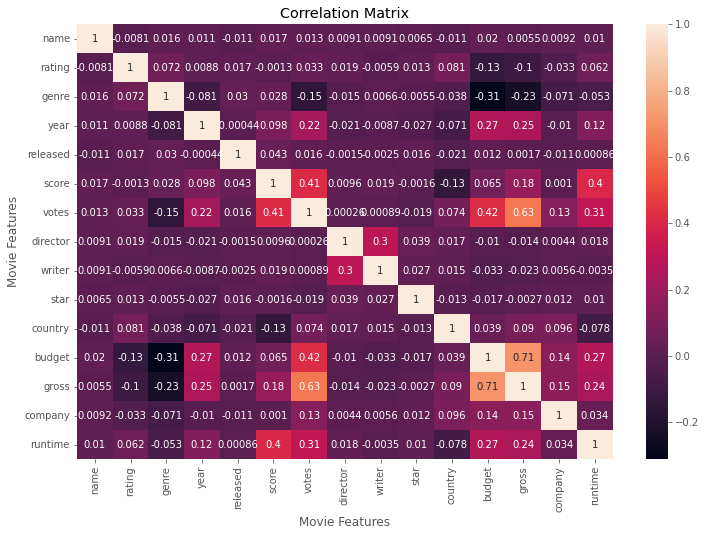

In [48]:
correlation_matrix = data_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Unstack Data

In [56]:
data_numerized.corr().unstack().sort_values()

budget   genre     -0.310566
genre    budget    -0.310566
gross    genre     -0.230267
genre    gross     -0.230267
votes    genre     -0.145307
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

High Correlation

In [58]:
sort_data = data_numerized.corr().unstack().sort_values()
High_cor = sort_data[(sort_data) > 0.5]
High_cor

gross     votes       0.628713
votes     gross       0.628713
budget    gross       0.711270
gross     budget      0.711270
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

# Therefore Gross and Budget have highest correlation
  ## followed by gross and votes